# Propagation of a light pulse in a dispersive medium

In this exercise we will solve the time evolution of a light pulse. We will describe its initial shape by function $A(z,t = 0)$, which is assumed to be Gaussian for simplicity:

$$
A(z, t=0) = e^{-z^2/2\sigma^2} e^{ik_0z}
$$

In plots etc, we will always only work with the real part of the wave package.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

A quick initial plot.

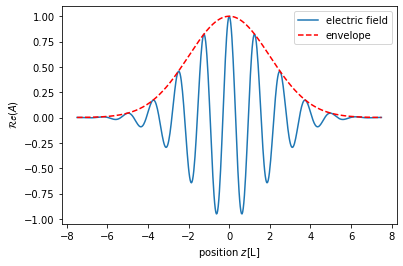

In [2]:
# properties of the wave package
sigmaz = 2
k0 = 5

# parameters for plotting
Nz = 512
zmax = 7.5

zlin = np.linspace(-zmax, zmax, Nz)
Az = np.exp(-zlin**2/2/sigmaz**2)*np.exp(1j*k0*zlin)
Aenv = np.exp(-zlin**2/2/sigmaz**2)

f, ax = plt.subplots()
ax.plot(zlin, Az.real, label = 'electric field');
ax.plot(zlin, Aenv, 'r', ls = '--', label='envelope');
ax.set_xlabel('position $z$[L]');
ax.set_ylabel(' $\mathcal{Re}(A)$');
ax.legend()

We would now like to understand, how this wave-package propagates. In a non-linear medium the propagation is not easily solved, but we have to know the dispersion relationship of the medium. In our case, we will use the relationship:

$$
\omega(k) = k_0 v_p + (k-k_0)v_g + \frac{\Gamma}{2}(k-k_0)^2
$$

For each single wavelength $k$, we then know the time evolution of the wave package to be:

$$
a(k,t) = a(k, t=0) e^{-i\omega(k)t}
$$

And the full time evolution is then obtain through the Fourier transform

$$
A(z, t) = \int dk e^{ikz} a(k,t)
$$

## The intial wavepackage in Fourier space

As we know $A(z,t=0)$, we can now also directly calculate:

$$
\begin{align}
a(k) &= \frac{1}{2\pi} \int dz e^{-ikz}A(z)\\
 &= \frac{1}{2\pi} \int dz e^{-i(k-k_0)z}e^{-z^2/2\sigma^2}\\
\end{align}
$$

This is a Gaussian integral of the type $\int dz e^{-z^2} = \sqrt{\pi}$. We will rewrite:

$$
i(k-k_0)z+z^2/2\sigma^2 = \frac{\left[z+i(k-k_0)\sigma^2\right]^2}{2\sigma^2}+\frac{(k-k_0)^2\sigma^2}{2}
$$

We can now shift the limits of the integral to obtain:

$$
\begin{align}
a(k) &= \frac{1}{2\pi} e^{-\frac{(k-k_0)^2\sigma^2}{2}}\int dz e^{-\frac{z^2}{2\sigma^2}}
\end{align}
$$

Changing the variable of integration to $z' = \frac{z}{\sqrt{2}\sigma}$, we end up with the integral:

$$
\begin{align}
a(k) &= \frac{\sqrt{2}\sigma}{2\pi} e^{-\frac{(k-k_0)^2\sigma^2}{2}}\int dz' e^{-z'^2}\\
&= \frac{\sigma}{\sqrt{2\pi}} e^{-\frac{(k-k_0)^2\sigma^2}{2}}
\end{align}
$$

It is Gaussian centered around $k_c$ and of width $\sigma_k = \frac{1}{\sigma}$

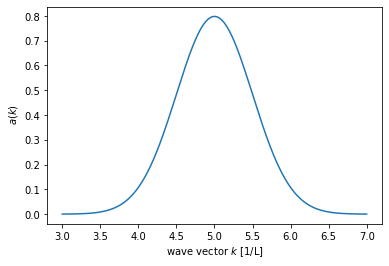

In [3]:
Nk = 512;
klin = k0 + np.linspace(-4/sigmaz, 4/sigmaz, Nk);
ak = sigmaz/np.sqrt(2*np.pi)*np.exp(-sigmaz**2/2*(klin-k0)**2)

f, ax = plt.subplots()
ax.plot(klin, ak);
ax.set_xlabel('wave vector $k$ [1/L]');
ax.set_ylabel(' $a(k)$');

## Time evolution in k space

We are now ready to simply calculate the time evolution of the wave package in k space. It is given by:

$$
a(k,t) = \frac{\sigma}{\sqrt{2\pi}} e^{-\frac{\sigma^2}{2}(k-k_0)^2} e^{-i\left[k_0 v_p + (k-k_0)v_g + \frac{\Gamma}{2}(k-k_0)^2\right]t}
$$

Quite importantly it remains a Gaussian in $k$, but only we complex numbers. Ordering in polynoms of k, we have:

$$
a(k,t) = \frac{\sigma}{\sqrt{2\pi}} e^{-\frac{\sigma^2-i\Gamma t}{2}(k-k_0)^2} e^{-i\left[k_0 v_p + (k-k_0)v_g\right]t}
$$

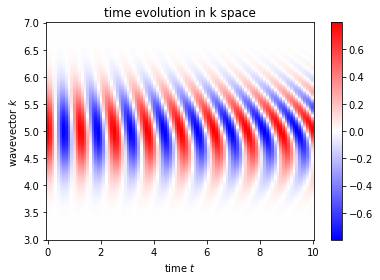

In [4]:
# parameters of the dispersion relation. You can set them freely
vp = 1
vg = 0.5
gamma = 1

#time
tmax = 10; Nt = 100;

tlin = np.linspace(0, tmax, Nt)
ks, ts = np.meshgrid(klin, tlin);

# the dispersion relationship
omegak = k0*vp+(ks-k0)*vg+gamma/2*(ks-k0)**2
aks = sigmaz/np.sqrt(2*np.pi)*np.exp(-sigmaz**2/2*(ks-k0)**2)

akt = ak*np.exp(-1j*omegak*ts);

f, ax = plt.subplots()
im1 = ax.pcolormesh(ts, ks, akt.real, cmap = 'bwr')
ax.set_xlabel('time $t$')
ax.set_ylabel('wavevector $k$')
ax.set_title('time evolution in k space')
f.colorbar(im1)

# Time evolution in real space

We have now everything assembled together to calculate the time evolution in real space:

$$
A(z, t) = \int dk e^{ikz} a(k,t)
$$

Given the nice form of $a(k,t)$, we can already read it off:

- The width will be the inverse of $\sigma_x = \frac{1}{\sqrt{\sigma^2-i\Gamma t}}$
- It is centered around $v_g t$
- It has some complicafted phase prefactor, which we will simply ignore here.

We then obtain:

$$
A(z, t) \propto e^{-\frac{(z-v_gt)^2}{2\left(\sigma^2 -i\Gamma t\right)}}
$$

To make it simpler to understand we rewrite:

$$
 \frac{1}{\sigma^2-i\Gamma t} = \frac{\sigma^2+i\Gamma t}{\sigma^4+\Gamma^2 t^2}
$$

The wave function has then the following form:

$$
A(z, t) \propto e^{-\frac{(z-v_gt)^2}{2\left(\sigma^4+\Gamma^2 t^2\right)}\left(\sigma^2+i\Gamma t\right)}
$$

This is a Gaussian that is centered at $z = v_gt$ with envelope:

$$
\sigma^2_x(t) = \sigma^2+\Gamma^2 t^2/\sigma^2
$$

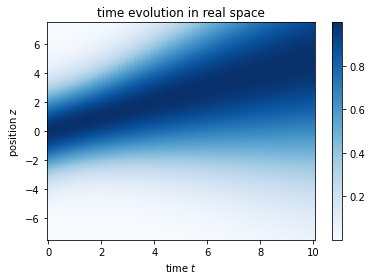

In [5]:
zs, ts = np.meshgrid(zlin, tlin);

# the dispersion relationship
sigmat_sq = sigmaz**2+gamma**2*ts**2/sigmaz**2

azt = np.exp(-(zs-vg*ts)**2/2/sigmat_sq);

f, ax = plt.subplots()
im1 = ax.pcolormesh(ts, zs, azt, cmap = 'Blues')
ax.set_xlabel('time $t$')
ax.set_ylabel('position $z$')
ax.set_title('time evolution in real space')
f.colorbar(im1)